## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Importing Data

In [2]:
df = pd.read_csv('train_ctrUa4K.csv')

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Info on the data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


### Imputing Null values

In [6]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
gen = []
for i,j in zip(df.Gender,df.ApplicantIncome):
    if (i is np.nan) and (j>4643):
        gen.append('Male')
    elif (i is np.nan) and (j <= 4643):
        gen.append('Female')
    else:
        gen.append(i)

In [8]:
df['Gender'] = gen

In [9]:
# df.ApplicantIncome.groupby(df.Married).mean()

In [10]:
mar = []
for i,j in zip(df.Married,df.ApplicantIncome):
    if (i is np.nan) and (j>4970):
        mar.append('Yes')
    elif (i is np.nan) and (j <= 4970):
        mar.append('No')
    else:
        mar.append(i)

In [11]:
df['Married'] = mar

In [12]:
### Imputing dependants value as 1 if married, else with mode
dep = []
for i,j in zip(df.Dependents,df.Married):
    if (i is np.nan) and (j == 'Yes'):
        dep.append('1')
    else:
        dep.append(i)

In [13]:
df['Dependents'] = dep

In [14]:
df.Dependents.value_counts()

0     345
1     111
2     101
3+     51
Name: Dependents, dtype: int64

In [15]:
df['Dependents'].fillna('0',axis=0,inplace=True)

In [16]:
# df.ApplicantIncome.groupby(df.Self_Employed).mean()

In [17]:
se = []
for i,j in zip(df.Self_Employed,df.ApplicantIncome):
    if (i is np.nan) and (j > 5050):
        se.append('Yes')
    elif (i is np.nan) and (j <= 5050):
        se.append('No')
    else:
        se.append(i)

In [18]:
df['Self_Employed'] = se

In [19]:
# df.LoanAmount.median()

In [20]:
df['LoanAmount'].fillna(128,axis=0,inplace=True)

In [21]:
# df.Loan_Amount_Term.value_counts()

In [22]:
df['Loan_Amount_Term'].fillna(360,axis=0,inplace=True)

In [23]:
# df.Credit_History.value_counts()

In [24]:
df['Credit_History'].fillna(1,axis=0,inplace=True)

In [25]:
# df.isnull().sum()

## Data Analysis & Feature Engineering 

In [138]:
print(df.Loan_Status.value_counts(normalize=False))
print(df.Loan_Status.value_counts(normalize=True))

Y    422
N    192
Name: Loan_Status, dtype: int64
Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64


### Inference : 32% of loan requests have been rejected

In [26]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Adding new feature "Total_family_income"

In [26]:
df['Total_family_income'] = df['ApplicantIncome']+df['CoapplicantIncome']

### Mean / median / max / min of the income 

In [28]:
def mxmn(feature):
    print('max    : ',df[feature].max())
    print('mean   : ',df[feature].mean())
    print('median : ',df[feature].median())
    print('min    : ',df[feature].min())

In [29]:
mxmn('CoapplicantIncome')

max    :  41667.0
mean   :  1621.2457980271008
median :  1188.5
min    :  0.0


In [30]:
mxmn('ApplicantIncome')

max    :  81000
mean   :  5403.459283387622
median :  3812.5
min    :  150


In [31]:
mxmn('Total_family_income')

max    :  81000.0
mean   :  7024.705081414722
median :  5416.5
min    :  1442.0


In [27]:
ai = []
for i in df['ApplicantIncome']:
    if i < 3812:
        ai.append('Poor')
    elif 3812<=i<5403:
        ai.append('MiddleClass')
    elif i >= 5403:
        ai.append('Rich')

In [28]:
df['ApplicantIncome_Category'] = ai

In [29]:
df['ApplicantIncome_Category'].value_counts()

Poor           306
Rich           176
MiddleClass    132
Name: ApplicantIncome_Category, dtype: int64

In [30]:
fi = []
for i in df['Total_family_income']:
    if i < 5416:
        fi.append('Poor')
    elif 5416<=i<7024:
        fi.append('MiddleClass')
    elif i >= 7024:
        fi.append('Rich')

In [31]:
df['Total_family_income_Category'] = fi

### Distributions and outliers

In [37]:
# plt.figure(figsize=(10,25))
# sns.boxplot(y = df.ApplicantIncome)
# plt.grid()
# plt.yticks(np.arange(0,90000,1000))
# plt.show()

In [43]:
appin_ls = pd.DataFrame(df.Loan_Status.groupby(df.ApplicantIncome_Category).value_counts(normalize=False))

In [42]:
pr = appin_ls['Loan_Status']

In [44]:
appin_ls['Percentage'] = pr




                                      Loan_Status  Percentage
ApplicantIncome_Category Loan_Status                         
MiddleClass              Y                     91    0.689394
                         N                     41    0.310606
Poor                     Y                    210    0.686275
                         N                     96    0.313725
Rich                     Y                    121    0.687500
                         N                     55    0.312500


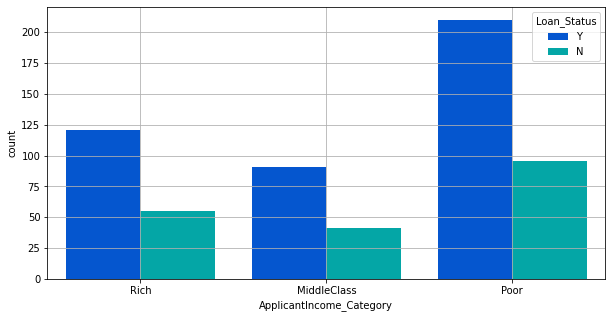

In [45]:
## Applicant Income category and loan status
plt.figure(figsize=(10,5))
sns.countplot(df.ApplicantIncome_Category,hue=df.Loan_Status,saturation=0.95,palette='winter')
print('\n\n')
print(appin_ls)
plt.grid()
plt.show()

In [49]:
famin_ls = pd.DataFrame(df.Loan_Status.groupby(df.Total_family_income_Category).value_counts(normalize=False))

In [48]:
# pr = famin_ls['Loan_Status']

In [50]:
famin_ls['Percentage'] = pr*100




                                          Loan_Status  Percentage
Total_family_income_Category Loan_Status                         
MiddleClass                  Y                     96   72.180451
                             N                     37   27.819549
Poor                         Y                    208   67.973856
                             N                     98   32.026144
Rich                         Y                    118   67.428571
                             N                     57   32.571429


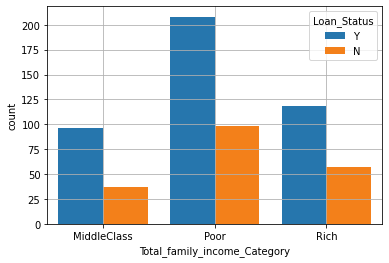

In [51]:
## Total family Income category and loan status
sns.countplot(df.Total_family_income_Category,hue=df.Loan_Status,saturation=0.9)
print('\n\n')
print(famin_ls)
plt.grid()
plt.show()

### Inference : we can infer that only 27% of the middle class customer's (Total family income between 5416 and 7024) loan is being rejected. On the other hand, 32% of both rich ( Total Income > 7024) and Poor (total income < 5416) customer's loan have been rejected.
###  Probability of a loan getting rejected for the rich and poor are higher than the Middle class! 

   ApplicantIncome Loan_Status
0      5446.078125           N
1      5384.068720           Y


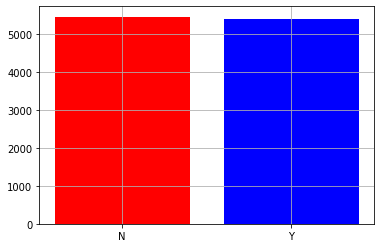

In [52]:
api_ls = pd.DataFrame(df.ApplicantIncome.groupby(df.Loan_Status).mean())
api_ls['Loan_Status'] = api_ls.index
api_ls.index = np.arange(0,len(api_ls))

plt.bar(api_ls.Loan_Status,api_ls.ApplicantIncome,color = ['r','b'])
plt.grid()
print(api_ls)
plt.show()

### Inference : Loan is not rejected based on the applicant's Income 

In [53]:
df.Total_family_income.groupby(df.Property_Area).mean()

Property_Area
Rural        7199.620782
Semiurban    6812.394850
Urban        7114.598020
Name: Total_family_income, dtype: float64

In [63]:
prop_status = pd.DataFrame(df.Loan_Status.groupby(df.Property_Area).value_counts(normalize=False))

In [59]:
pr = prop_status['Loan_Status']

In [65]:
prop_status['Percentage'] = pr

In [66]:
prop_status

Loan_Status  Percentage
Property_Area Loan_Status                         
Rural         Y                    110    0.614525
              N                     69    0.385475
Semiurban     Y                    179    0.768240
              N                     54    0.231760
Urban         Y                    133    0.658416
              N                     69    0.341584

### Inference :  We can infer that only 23% of loans from semi urban customers are being rejected and 38% of rural customers are being rejected 

In [75]:
gen_ls = pd.DataFrame(df.Loan_Status.groupby(df.Gender).value_counts(normalize=False)).sort_index()

In [74]:
pr = gen_ls['Loan_Status']

In [76]:
gen_ls['Percentage'] = pr*100




                    Loan_Status  Percentage
Gender Loan_Status                         
Female N                     42   35.294118
       Y                     77   64.705882
Male   N                    150   30.303030
       Y                    345   69.696970


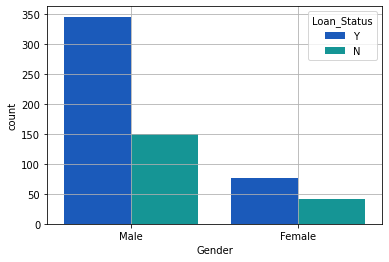

In [77]:
## count of loan status with hue gender
sns.countplot(df.Gender,palette='winter',hue=df.Loan_Status)
plt.grid()
print('\n\n')
print(gen_ls)
# print(df.Loan_Status.value_counts(),'\n')
plt.show()

### Inference : we can infer that 35% of loans are being rejected for females and only 30% of loans are rejected for male

In [87]:
edu_ls = pd.DataFrame(df.Loan_Status.groupby(df.Education).value_counts(normalize=False))

In [86]:
# pr = edu_ls['Loan_Status']

In [88]:
edu_ls['Percentage'] = pr*100




                          Loan_Status  Percentage
Education    Loan_Status                         
Graduate     Y                    340   70.833333
             N                    140   29.166667
Not Graduate Y                     82   61.194030
             N                     52   38.805970 



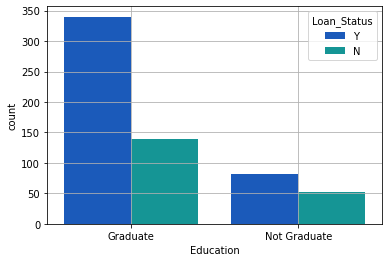

In [89]:
## count of loan status with hue Education
sns.countplot(df.Education,palette='winter',hue=df.Loan_Status)
plt.grid()
print('\n\n')
print(edu_ls,'\n')
plt.show()

### Inference : almost 39% of loans for Non Graduates are being rejected but only 29% of the loans for Graduates are Rejected.

In [94]:
self_ls = pd.DataFrame(df.Loan_Status.groupby(df.Self_Employed).value_counts(normalize=False))

In [95]:
# pr = self_ls['Loan_Status']

In [96]:
self_ls['Percentage'] = pr*100




                           Loan_Status  Percentage
Self_Employed Loan_Status                         
No            Y                    361   68.893130
              N                    163   31.106870
Yes           Y                     61   67.777778
              N                     29   32.222222 



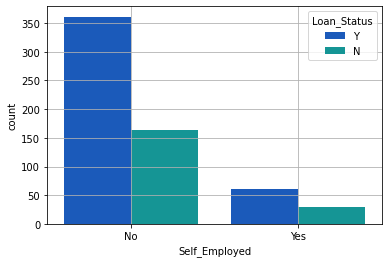

In [99]:
## count of loan status with hue Self_Employed
sns.countplot(df.Self_Employed,palette='winter',hue=df.Loan_Status)
plt.grid()
print('\n\n')
print(self_ls,'\n')
plt.show()

In [104]:
cred_ls = pd.DataFrame(df.Loan_Status.groupby(df.Credit_History).value_counts(normalize=False))

In [103]:
pr = cred_ls['Loan_Status']

In [105]:
cred_ls['Percentage'] = pr*100




                            Loan_Status  Percentage
Credit_History Loan_Status                         
0.0            N                     82   92.134831
               Y                      7    7.865169
1.0            Y                    415   79.047619
               N                    110   20.952381 



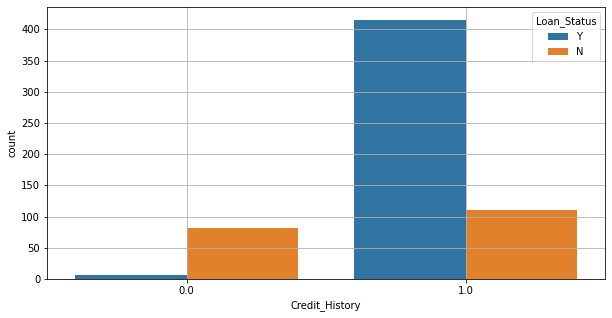

In [109]:
plt.figure(figsize=(10,5))
sns.countplot(df.Credit_History,hue=df.Loan_Status)
print('\n\n')
print(cred_ls,'\n')
plt.grid()
plt.show()

### Inference : 92% of the customers whose credit history marked as 0 are being rejected for loans and only 8% of those customers are approved loans. (20% of customers whose credit history marked as 1 are being rejected for loans too! ) 

In [113]:
dep_ls = pd.DataFrame(df.Loan_Status.groupby(df.Dependents).value_counts(normalize=False))

In [112]:
pr = dep_ls['Loan_Status']

In [114]:
dep_ls['Percentage'] = pr*100




                        Loan_Status  Percentage
Dependents Loan_Status                         
0          Y                    242   68.945869
           N                    109   31.054131
1          Y                     71   63.963964
           N                     40   36.036036
2          Y                     76   75.247525
           N                     25   24.752475
3+         Y                     33   64.705882
           N                     18   35.294118 



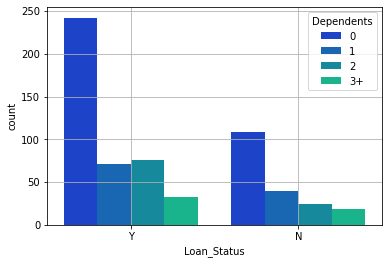

In [115]:
## count of loan status with hue dependents
sns.countplot(df.Loan_Status,palette='winter',hue=df.Dependents)
plt.grid()
print('\n\n')
print(dep_ls,'\n')
plt.show()

### Inference : 36% of customers with 1 dependent and 35% customers with more than 3 dependents have been rejected for loans. Only 25% of customers with 2 dependents have been rejected for loans

### Descriptive

In [32]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.50,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.00,1188.5,2297.25,41667.0
LoanAmount,614.0,145.752443,84.107233,9.0,100.25,128.0,164.75,700.0
Loan_Amount_Term,614.0,342.410423,64.428629,12.0,360.00,360.0,360.00,480.0
Credit_History,614.0,0.855049,0.352339,0.0,1.00,1.0,1.00,1.0
Total_family_income,614.0,7024.705081,6458.663872,1442.0,4166.00,5416.5,7521.75,81000.0


In [33]:
gen_appin = pd.DataFrame(df.ApplicantIncome.groupby(df.Gender).mean())
gen_appin

,ApplicantIncome
Gender,
Female,4522.747899
Male,5615.185859


### Inference : Male customers have more income than female customers

In [34]:
gen_loanamt = pd.DataFrame(df.LoanAmount.groupby(df.Gender).mean())
gen_loanamt['Percentage'] = (gen_loanamt.LoanAmount/gen_loanamt.LoanAmount.sum())*100
gen_loanamt

,LoanAmount,Percentage
Gender,,
Female,127.369748,45.892151
Male,150.171717,54.107849


### Inference : 55% of the total money given for loan are for male customers and 45% are for female customers. Male customers borrow more money than female customers

In [35]:
print(df.Credit_History.value_counts(normalize=True))
print(df.Credit_History.value_counts(normalize=False))

1.0    0.855049
0.0    0.144951
Name: Credit_History, dtype: float64
1.0    525
0.0     89
Name: Credit_History, dtype: int64


### Inference : 14% of the customers have credit history marked 0.

In [184]:
lat_ls = pd.DataFrame(df.Loan_Status.groupby(df.Loan_Amount_Term).value_counts(normalize=False))

In [183]:
pr = lat_ls['Loan_Status']

In [185]:
lat_ls['Percentage'] = pr*100




                              Loan_Status  Percentage
Loan_Amount_Term Loan_Status                         
12.0             Y                      1  100.000000
36.0             N                      2  100.000000
60.0             Y                      2  100.000000
84.0             Y                      3   75.000000
                 N                      1   25.000000
120.0            Y                      3  100.000000
180.0            Y                     29   65.909091
                 N                     15   34.090909
240.0            Y                      3   75.000000
                 N                      1   25.000000
300.0            Y                      8   61.538462
                 N                      5   38.461538
360.0            Y                    367   69.771863
                 N                    159   30.228137
480.0            N                      9   60.000000
                 Y                      6   40.000000 



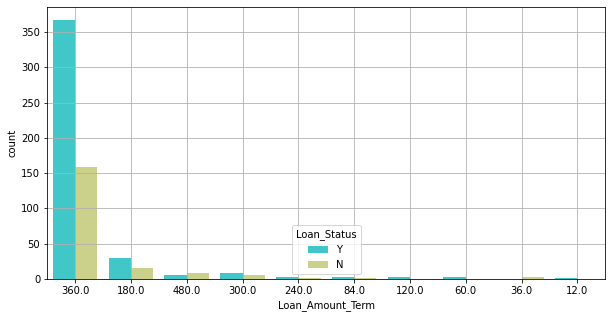

In [186]:
plt.figure(figsize=(10,5))
sns.countplot(df.Loan_Amount_Term,palette='rainbow',order=df.Loan_Amount_Term.value_counts().index,hue=df.Loan_Status)
plt.grid()
print('\n\n')
print(lat_ls,'\n')
plt.show()

### Inference : Greater the loan amount term, greater the probability of a loan getting rejected.

In [188]:
lat_loanamt = pd.DataFrame(df.LoanAmount.groupby(df.Loan_Amount_Term).mean())
# lat_loanamt

<AxesSubplot:>

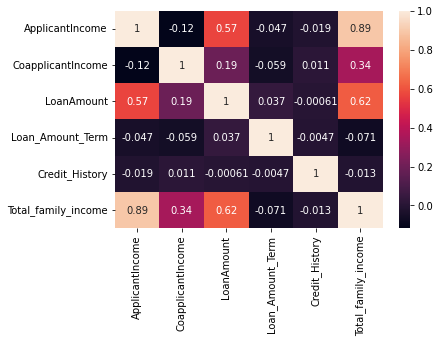

In [36]:
sns.heatmap(df.corr(),annot=True)

### Inferences: 
1. Applicant Income and Total Family income are 89% Positively correlated 
2. Total Family income and Loan amount are 62% Positively corelated
3. Loan amount and Applicant Income are 57% positively corelated. 
4. Loan amount and co applicant income are 20% Positively corelated

In [39]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_family_income,ApplicantIncome_Category,Total_family_income_Category
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0,Rich,MiddleClass
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,MiddleClass,MiddleClass
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,Poor,Poor
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,Poor,Poor
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,Rich,MiddleClass


In [40]:
ml = df.copy()

In [47]:
ml.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_family_income,ApplicantIncome_Category,Total_family_income_Category
0,LP001002,1,0,0,1,0,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0,Rich,MiddleClass
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,MiddleClass,MiddleClass
2,LP001005,1,1,0,1,0,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,Poor,Poor
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,Poor,Poor
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,Rich,MiddleClass


In [43]:
gen = []
for i in ml.Gender:
    if i == 'Male':
        gen.append(1)
    else:
        gen.append(0)
ml['Gender'] = gen

In [44]:
mar = []
for i in ml.Married:
    if i == 'Yes':
        mar.append(1)
    else:
        mar.append(0)
ml['Married'] = mar

In [45]:
edu = []
for i in ml.Education:
    if i == 'Graduate':
        edu.append(1)
    else:
        edu.append(0)
ml['Education'] = edu

In [46]:
se = []
for i in ml.Self_Employed:
    if i == 'Graduate':
        se.append(1)
    else:
        se.append(0)
ml['Self_Employed'] = se

In [49]:
ml.Total_family_income_Category.value_counts()

Poor           306
Rich           175
MiddleClass    133
Name: Total_family_income_Category, dtype: int64

In [50]:
tfi =[]
for i in ml.Total_family_income_Category:
    if i == 'Poor':
        tfi.append(1)
    elif i == 'Rich':
        tfi.append(2)
    elif i == 'MiddleClass':
        tfi.append(3)
ml['Total_family_income_Category'] = tfi

In [56]:
ml.Property_Area.value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [57]:
pa = []
for i in ml.Property_Area:
    if i == 'Semiurban':
        pa.append(1)
    elif i == 'Urban':
        pa.append(2)
    elif i == 'Rural':
        pa.append(3)
ml['Property_Area'] = pa

In [60]:
ls = []
for i in ml.Loan_Status:
    if i == 'Y':
        ls.append(1)        
    else:
        ls.append(0)
ml['Loan_Status'] = ls

In [69]:
ml.Dependents.value_counts()

0     351
1     111
2     101
3+     51
Name: Dependents, dtype: int64

In [70]:
dp = []
for i in ml.Dependents:
    if i == '0':
        dp.append(0)
    elif i  == '1':
        dp.append(1)
    elif i == '2':
        dp.append(2)
    elif i == '3+':
        dp.append(3)
ml['Dependents'] = dp

In [61]:
ml.drop('Loan_ID',axis=1,inplace=True)

In [52]:

ml.drop('ApplicantIncome_Category',axis=1,inplace=True) 

In [71]:
ml.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_family_income,Total_family_income_Category
0,1,0,0,1,0,5849,0.0,128.0,360.0,1.0,2,1,5849.0,3
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,3,0,6091.0,3
2,1,1,0,1,0,3000,0.0,66.0,360.0,1.0,2,1,3000.0,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1,4941.0,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1,6000.0,3


In [72]:
ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Gender                        614 non-null    int64  
 1   Married                       614 non-null    int64  
 2   Dependents                    614 non-null    int64  
 3   Education                     614 non-null    int64  
 4   Self_Employed                 614 non-null    int64  
 5   ApplicantIncome               614 non-null    int64  
 6   CoapplicantIncome             614 non-null    float64
 7   LoanAmount                    614 non-null    float64
 8   Loan_Amount_Term              614 non-null    float64
 9   Credit_History                614 non-null    float64
 10  Property_Area                 614 non-null    int64  
 11  Loan_Status                   614 non-null    int64  
 12  Total_family_income           614 non-null    float64
 13  Total

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [74]:
x = ml.drop('Loan_Status',axis=1)
y = ml.Loan_Status

In [75]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.15,random_state=43)

In [76]:
lr = LogisticRegression()
kn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
xgb = XGBClassifier()
xgbrf = XGBRFClassifier()
cat = CatBoostClassifier(verbose=False)
lgb = LGBMClassifier()

In [77]:
rf.fit(xtrain,ytrain)

RandomForestClassifier()

In [80]:
ypred = rf.predict(xtest)

In [81]:
accuracy_score(ytest,ypred)

0.7956989247311828

In [82]:
confusion_matrix(ytest,ypred)

array([[18, 11],
       [ 8, 56]], dtype=int64)

In [84]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.69      0.62      0.65        29
           1       0.84      0.88      0.85        64

    accuracy                           0.80        93
   macro avg       0.76      0.75      0.75        93
weighted avg       0.79      0.80      0.79        93

